# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated 

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    

    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 1 | vestmannaeyjar
Processing Record 3 of Set 1 | constitucion
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | arklow
Processing Record 7 of Set 1 | santiago del estero
Processing Record 8 of Set 1 | prince rupert
Processing Record 9 of Set 1 | fairview
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | shunyi
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | coahuayana
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | alice springs
Processing Record 21 of Set 1 | grindavik
Proce

Processing Record 39 of Set 4 | upernavik
Processing Record 40 of Set 4 | hegang
Processing Record 41 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 42 of Set 4 | chokurdakh
Processing Record 43 of Set 4 | cumaribo
City not found. Skipping...
Processing Record 44 of Set 4 | karaul
City not found. Skipping...
Processing Record 45 of Set 4 | rio brilhante
Processing Record 46 of Set 4 | belmonte
Processing Record 47 of Set 4 | souillac
Processing Record 48 of Set 4 | dawlatabad
Processing Record 49 of Set 4 | erenhot
Processing Record 0 of Set 5 | hualmay
Processing Record 1 of Set 5 | berlevag
Processing Record 2 of Set 5 | coihaique
Processing Record 3 of Set 5 | provideniya
Processing Record 4 of Set 5 | morehead
Processing Record 5 of Set 5 | puro
Processing Record 6 of Set 5 | karabash
Processing Record 7 of Set 5 | baykit
Processing Record 8 of Set 5 | tuatapere
Processing Record 9 of Set 5 | ust-maya
Processing Record 10 of Set 5 | evora
Processing Record 11 of 

Processing Record 28 of Set 8 | zyryanka
Processing Record 29 of Set 8 | sabang
Processing Record 30 of Set 8 | manaure
Processing Record 31 of Set 8 | half moon bay
Processing Record 32 of Set 8 | shimoda
Processing Record 33 of Set 8 | joshimath
Processing Record 34 of Set 8 | suchilquitongo
City not found. Skipping...
Processing Record 35 of Set 8 | santa maria
Processing Record 36 of Set 8 | canto do buriti
Processing Record 37 of Set 8 | fukue
Processing Record 38 of Set 8 | goderich
Processing Record 39 of Set 8 | axim
Processing Record 40 of Set 8 | xichang
Processing Record 41 of Set 8 | naryshkino
Processing Record 42 of Set 8 | maxixe
Processing Record 43 of Set 8 | rongcheng
Processing Record 44 of Set 8 | dano
Processing Record 45 of Set 8 | port hawkesbury
Processing Record 46 of Set 8 | westport
Processing Record 47 of Set 8 | mayo
Processing Record 48 of Set 8 | halifax
Processing Record 49 of Set 8 | mergui
City not found. Skipping...
Processing Record 0 of Set 9 | rich

Processing Record 14 of Set 12 | sampang
Processing Record 15 of Set 12 | haines junction
Processing Record 16 of Set 12 | broken arrow
Processing Record 17 of Set 12 | jian
Processing Record 18 of Set 12 | affery
Processing Record 19 of Set 12 | luba
Processing Record 20 of Set 12 | paita
Processing Record 21 of Set 12 | shakawe
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          520
Lat           520
Lng           520
Max Temp      520
Humidity      520
Cloudiness    520
Wind Speed    520
Country       520
Date          520
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vestmannaeyjar,63.4427,-20.2734,8.55,93,100,11.83,IS,1685295257
1,constitucion,-35.3333,-72.4167,13.21,52,100,2.02,CL,1685295257
2,kodiak,57.7900,-152.4072,7.73,57,75,2.57,US,1685295257
3,bethel,41.3712,-73.4140,28.91,39,0,3.09,US,1685295257
4,arklow,52.7931,-6.1414,15.04,67,1,6.82,IE,1685295032


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vestmannaeyjar,63.4427,-20.2734,8.55,93,100,11.83,IS,1685295257
1,constitucion,-35.3333,-72.4167,13.21,52,100,2.02,CL,1685295257
2,kodiak,57.7900,-152.4072,7.73,57,75,2.57,US,1685295257
3,bethel,41.3712,-73.4140,28.91,39,0,3.09,US,1685295257
4,arklow,52.7931,-6.1414,15.04,67,1,6.82,IE,1685295032


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

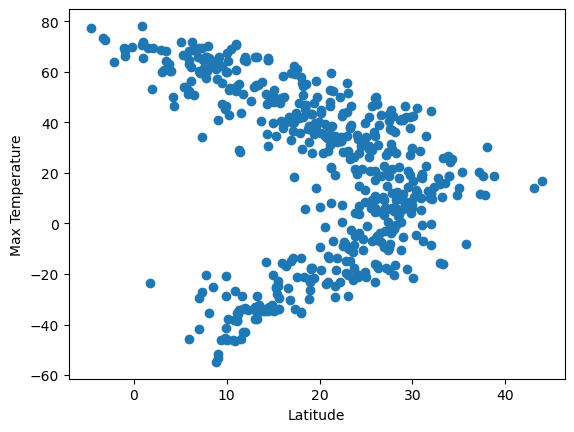

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

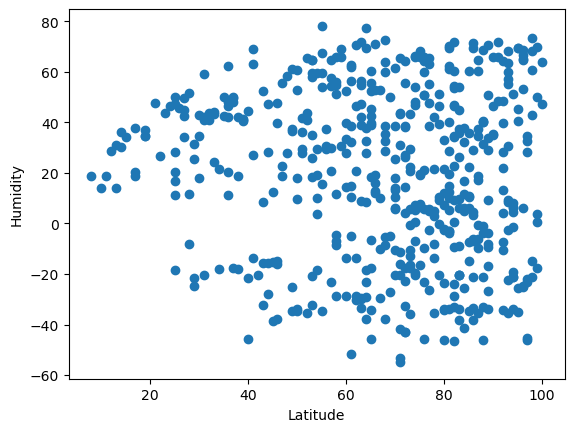

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

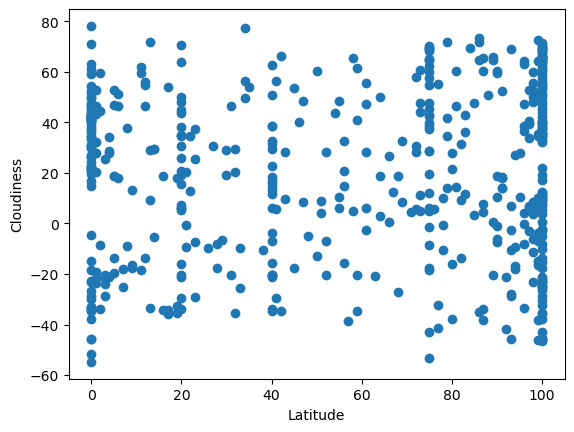

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

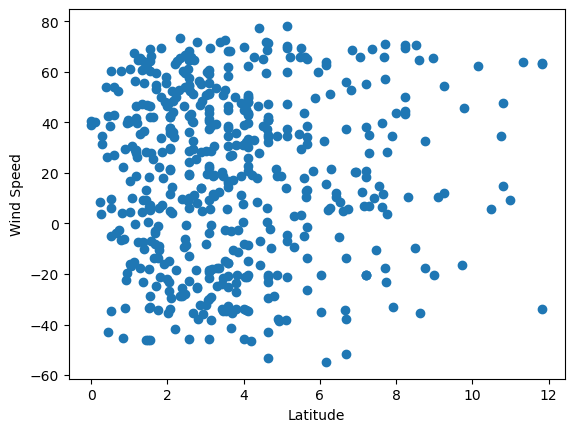

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vestmannaeyjar,63.4427,-20.2734,8.55,93,100,11.83,IS,1685295257
2,kodiak,57.7900,-152.4072,7.73,57,75,2.57,US,1685295257
3,bethel,41.3712,-73.4140,28.91,39,0,3.09,US,1685295257
4,arklow,52.7931,-6.1414,15.04,67,1,6.82,IE,1685295032
6,prince rupert,54.3161,-130.3201,11.05,82,100,9.26,CA,1685295258


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,constitucion,-35.3333,-72.4167,13.21,52,100,2.02,CL,1685295257
5,santiago del estero,-27.7951,-64.2615,15.39,44,93,2.45,AR,1685295257
8,vaini,-21.2000,-175.2000,24.09,88,20,5.14,TO,1685295258
9,castro,-24.7911,-50.0119,15.50,96,100,1.71,BR,1685295154
10,rikitea,-23.1203,-134.9692,22.16,64,98,7.73,PF,1685295258


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8009820433623276


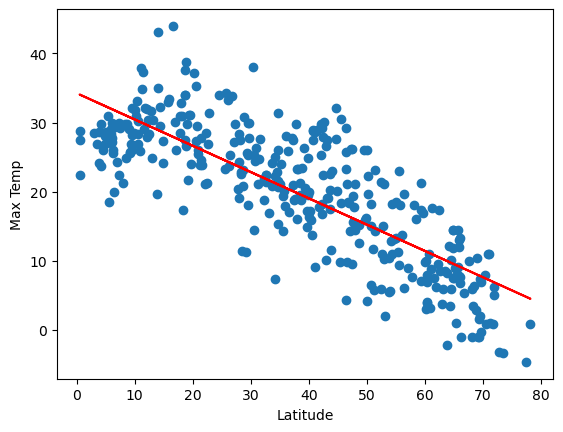

In [16]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.7958077380251819


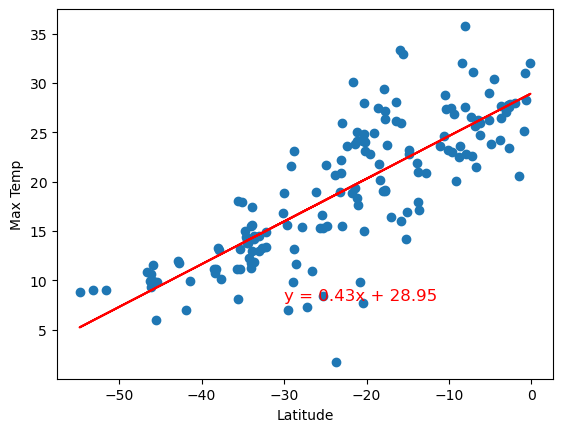

In [17]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

**Relationship between Temperature and Latitude:**  
* There is a fairly strong negative correlation between temperature and latitude with a correlation coefficient of -0.8088479825279142 on Northern Hemisphere.
* There is a relatively strong positive correlation between temperature and latitude with a correlation coefficient of 0.4395572110498053 on Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03262847734470588


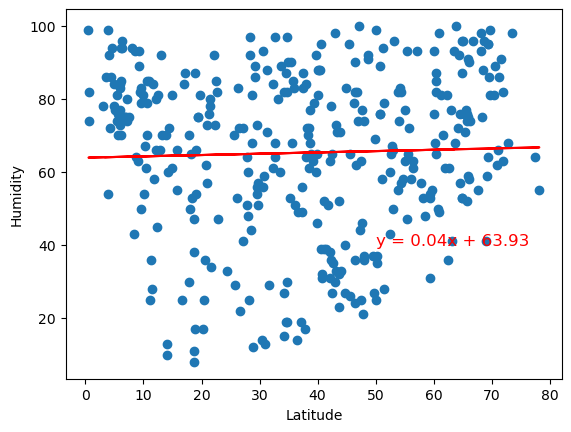

In [18]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The r-value is: 0.04971623828288718


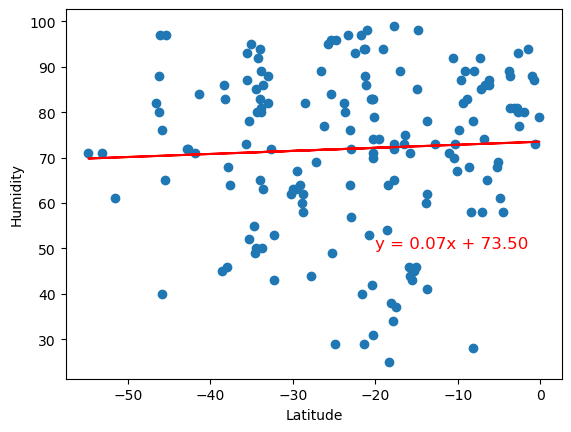

In [19]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

**Relationship between Humidity and Latitude:**  
* There is a relatively strong positive correlation between humidity and latitude with a correlation coefficient of 0.45185249370432223 on Northern Hemisphere.
* There is a relatively strong positive correlation correlation between humidity and latitude with a correlation coefficient of 0.5439636787499419 on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07905807848128424


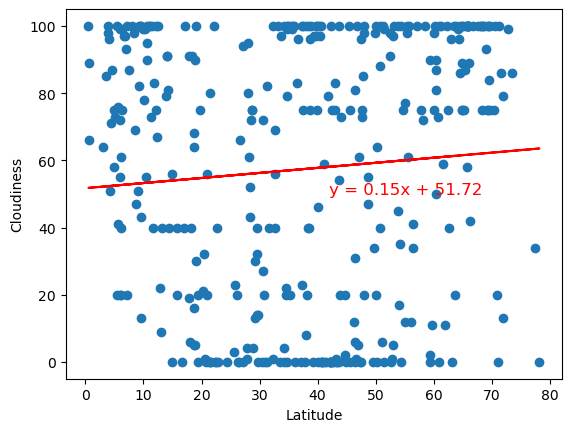

In [20]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: 0.10490993001672114


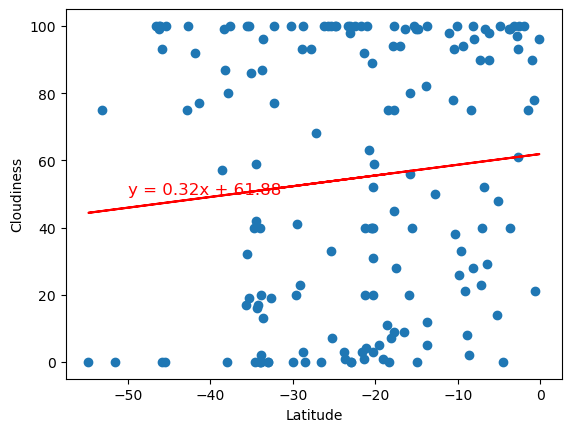

In [21]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

**Relationship between Cloudiness and Latitude:**  
* There is a weak positive correlation between cloudiness and latitude with a correlation coefficient of 0.30769331493282776 on Northern Hemisphere.
* There is a relatively strong positive correlation between cloudiness and latitude with a correlation coefficient of 0.4748614054462095 on Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.018783493993863098


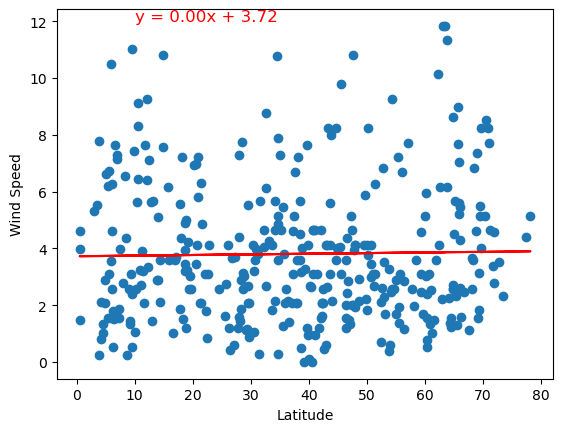

In [22]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.08372229904401263


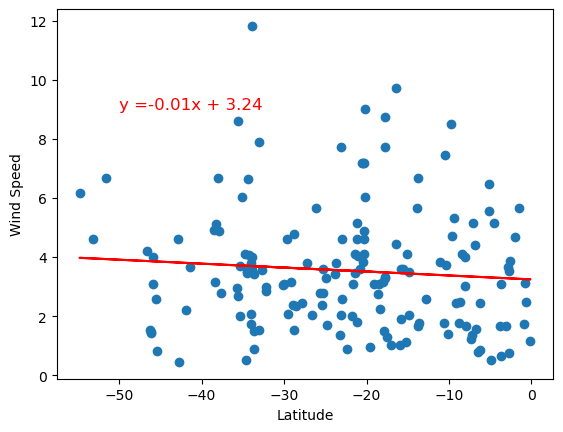

In [23]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Relationship between Wind Speed and Latitude:**  
* There is a negligible to almost no correlation between wind speed and latitude with a correlation coefficient of 0.21507837130179397 on Northern Hemisphere.
* There is a weak negative correlation between wind speed and latitude with a correlation coefficient of -0.33748967967974725 on Southern Hemisphere.